# Análisis Exploratorio de Datos del Conjunto de Datos de Vino

Este notebook se centra en la exploración de datos del conjunto de datos de vino, aplicando técnicas de análisis exploratorio y preprocesamiento de datos. El objetivo es preparar los datos para su uso posterior en análisis más avanzados como PCA y Naive Bayes.


## Importación de Librerías

En esta sección, importamos todas las librerías necesarias para el análisis de datos. Utilizamos `pandas` para la manipulación de datos, `numpy` para operaciones numéricas, y `matplotlib` y `seaborn` para visualización. Además, `scikit-learn` se utilizará para tareas de preprocesamiento.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split


## Carga del Conjunto de Datos

Cargamos el conjunto de datos de vino utilizando `pandas`. Este dataset contiene información química sobre diferentes tipos de vino, que se utilizará para construir modelos predictivos. Asegúrate de que el archivo de datos se encuentra en la carpeta correcta antes de continuar.


In [20]:
# Cargar el dataset
file_path = '../wine-classification-pca-naivebayes/data/raw/wine.data'
df = pd.read_csv(file_path, header=None)
df.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Exploración Inicial del Conjunto de Datos

Es importante comprender la estructura y el contenido del conjunto de datos antes de realizar cualquier análisis avanzado. Aquí, examinamos las primeras filas, obtenemos estadísticas descriptivas y verificamos la existencia de valores faltantes.


In [21]:
# Mostrar las primeras filas del dataset
df.head()

# Información general del dataset
df.info()

# Estadísticas descriptivas
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       178 non-null    int64  
 1   1       178 non-null    float64
 2   2       178 non-null    float64
 3   3       178 non-null    float64
 4   4       178 non-null    float64
 5   5       178 non-null    int64  
 6   6       178 non-null    float64
 7   7       178 non-null    float64
 8   8       178 non-null    float64
 9   9       178 non-null    float64
 10  10      178 non-null    float64
 11  11      178 non-null    float64
 12  12      178 non-null    float64
 13  13      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


## Análisis de Valores Faltantes

La presencia de valores faltantes puede afectar significativamente los resultados del análisis. Aquí, verificamos si existen valores faltantes en el conjunto de datos.


In [22]:
# Verificar valores faltantes
missing_values = df.isnull().sum()
print("Valores faltantes en cada columna:")
print(missing_values)


Valores faltantes en cada columna:
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
dtype: int64


## Distribución y Visualización de Variables

Entender la distribución de las variables es crucial para el análisis exploratorio de datos. Utilizamos histogramas y gráficos de distribución para visualizar las características clave del dataset.


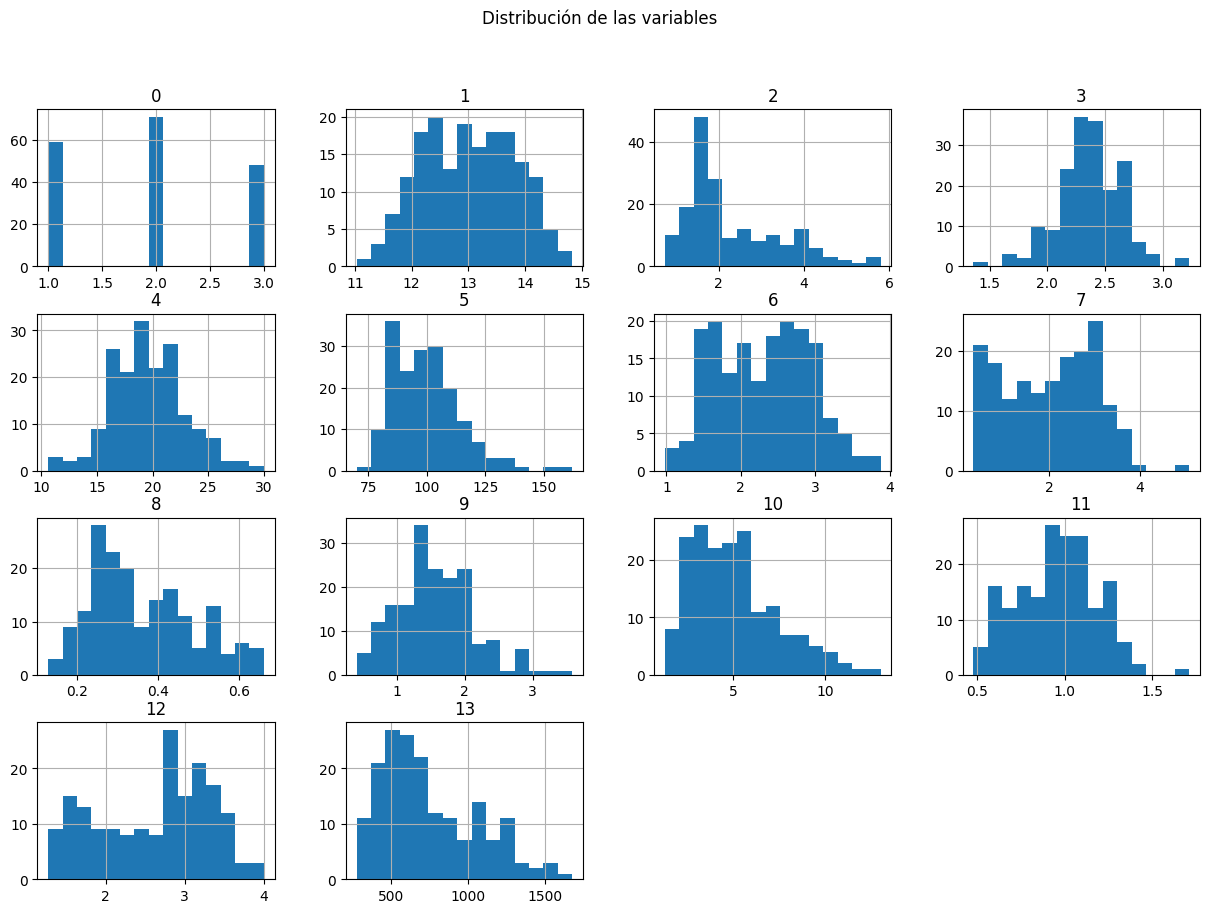

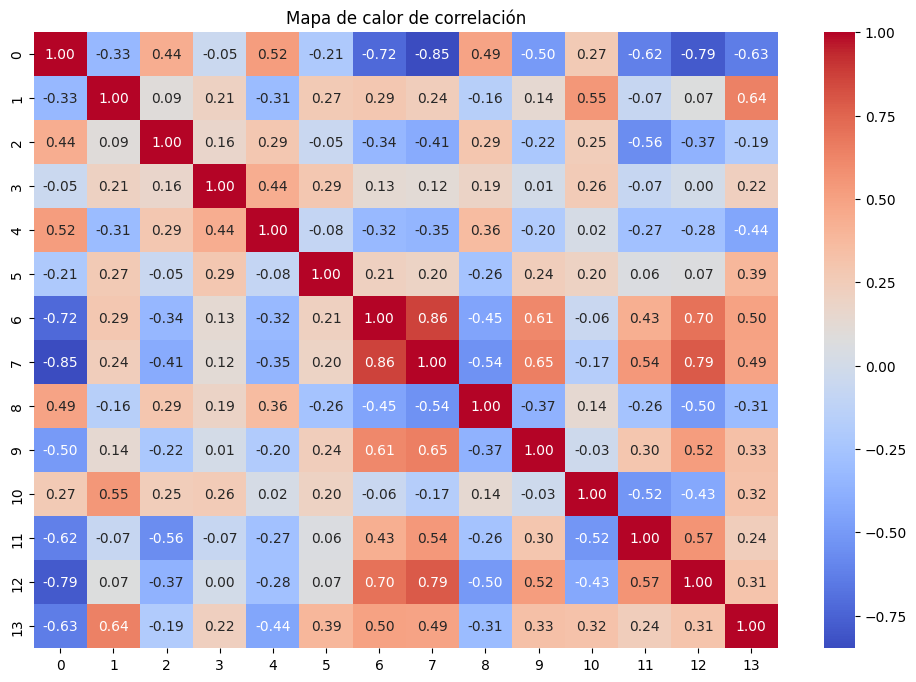

In [23]:
# Histograma de todas las columnas
df.hist(bins=15, figsize=(15, 10))
plt.suptitle("Distribución de las variables")
plt.show()

# Mapa de calor de la correlación entre variables
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Mapa de calor de correlación")
plt.show()


## Escalado de Datos

Para PCA y otros modelos, es importante escalar los datos para asegurar que todas las características contribuyan de manera equitativa al análisis. Utilizamos `StandardScaler` para normalizar los datos.


In [24]:
# Escalado de datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


## Conclusión de la Exploración de Datos

En esta sección, hemos realizado un análisis exploratorio detallado del conjunto de datos de vino. Hemos identificado las principales características del dataset, su distribución y la correlación entre variables. Además, hemos escalado los datos para su posterior análisis. En los próximos pasos, utilizaremos estas preparaciones para realizar PCA y construir modelos predictivos.
